In [3]:
X=list(range(10))
Y=[1,1,2,4,5,7,8,9,9,10]

print(len(X), len(Y))

10 10


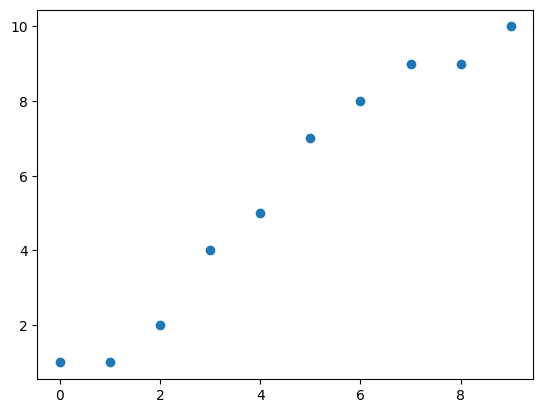

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

In [18]:
class H():
    def __init__(self, w):
        self.w = w
    
    def forward(self, x):
        return self.w*x
    
h = H(4)
h.forward(5)
        

20

In [20]:
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i])-Y[i])**2
    error = error/len(X)
    return error

h = H(4)
print(cost(h, X, Y))

222.2


In [21]:
def better_cost(pred_y, true_y):
    error = 0
    for i in range(len(X)):
        error += (pred_y[i] -true_y[i])**2
    error = error/len(X)
    return error

pred_y = [h.forward(X[i]) for i in range(len(X))]
print(better_cost(pred_y, Y))

222.2


[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


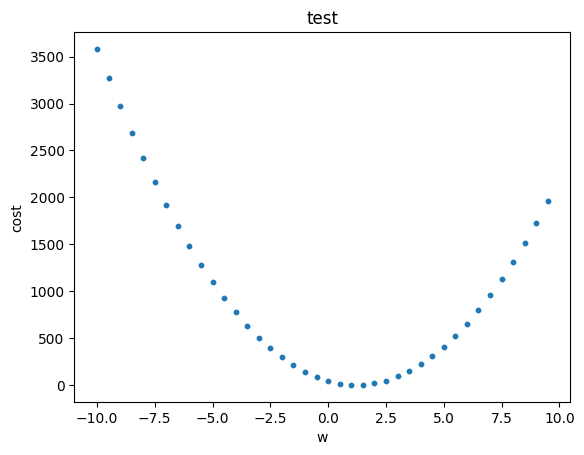

In [40]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i*0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)

print(list_w)
print(list_c)

plt.title('test')
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=10)
plt.show()


In [63]:
def cal_grad(w, cost): #수치해석적방법
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.001
    h = H(w+eps)
    cost2 = cost(h, X, Y)
    dcost = cost2-cost1
    dw = eps
    return dcost/dw, (cost1+cost2)*0.5

list_w1=[]
list_c1=[]

w = 4
lr = 0.01

for i in range(10):
    grad, mean_cost = cal_grad(w, cost)
    w = w + lr*(-grad)
    list_w1.append(w)
    list_c1.append(mean_cost)
    print(w, mean_cost)

2.4097149999996645 222.27951425
1.7258924499999893 41.45555799238956
1.4318487535000344 8.021208480384255
1.3054099640050296 1.8391972556110414
1.2510412845221694 0.696143380150062
1.2276627523445358 0.4847927185772622
1.217609983508152 0.44571398125243855
1.2132872929085068 0.4384883227210767
1.2114285359506587 0.43715229845862746
1.210629270458786 0.43690526757250037


In [64]:
list_w2=[]
list_c2=[]
def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2* (h.forward(X[i])- Y[i])*X[i]
    grad = grad/len(X)
    c = cost(h, X, Y)
    return grad, c

w = 4
lr = 0.01

for i in range(10):
    grad, mean_cost = cal_grad2(w, cost)
    w = w + lr*(-grad)
    list_w2.append(w)
    list_c2.append(c)
    print(w, mean_cost)

2.41 222.2
1.7263000000000002 41.44085000000001
1.432309 8.018483165000005
1.30589287 1.8386875372085008
1.2515339341 0.6960433256298524
1.228159591663 0.48476841090895945
1.21810862441509 0.4457036791770664
1.2137867084984888 0.4384806102798395
1.2119282846543502 0.4371450648407425
1.2111291624013707 0.43689812248905335


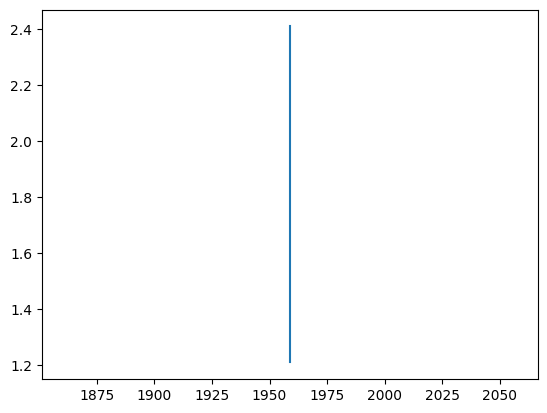

In [65]:
plt.plot(list_c1, list_w1)